# Verify AlphaFold accuracy for 500 targets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
af2_resolved_path = score_dir / 'af2_confidence_resolved.csv.gz'
af2_resolved_df = pd.read_csv(af2_resolved_path, index_col=0)
label_df = pd.merge(label_df, af2_resolved_df, on=['Target', 'Model'])
label_df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
187595       model_5_seed_1_rec_5_ens_1    0.987   0.971   0.873          NaN   
187596       model_5_seed_1_rec_6_ens_1    0.987   0.971   0.874          NaN   
187597       model_5_seed_1_rec_7_ens_1    0.987   0.971   0.874          NaN   
187598       model_5_seed_1_rec_8_ens_1    0.987   0.970   0.874          NaN   
187599       model_5_seed_1_rec_9_ens_1    0.987   0.971   0.874          NaN   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  Seed  Recycle  \
0           0.901  0.955     0.900      0.032  model_1_ptm     0       10   
1           0.901  0.956     0.901      0.019  model_1_ptm     0       10   
2           0.901  0.944     0.895     20.749  model_1_ptm     0        1   
3           0.901  0.947     0.896     20.749  model_1_ptm     0        1   
4           0.903  0.948     0.897      0.172  model_1_ptm     0        2   
...           ...    ...       ...        ...          ...   ...      ...   
187595        NaN  0.964       NaN      0.054      model_5     1        5   
187596        NaN  0.964       NaN      0.045      model_5     1        6   
187597        NaN  0.963       NaN      0.044      model_5     1        7   
187598        NaN  0.964       NaN      0.056      model_5     1        8   
187599        NaN  0.963       NaN      0.061      model_5     1        9   

        Ensemble  Target  Num_diff  Num_missing  Length  pLDDT_resolved  \
0              1  6AN4_A         0            7     158           0.963   
1              8  6AN4_A         0            7     158           0.964   
2              1  6AN4_A         0            7     158           0.954   
3              8  6AN4_A         0            7     158           0.956   
4              1  6AN4_A         0            7     158           0.958   
...          ...     ...       ...          ...     ...             ...   
187595         1  6R6U_A         0            4     462           0.968   
187596         1  6R6U_A         0            4     462           0.968   
187597         1  6R6U_A         0            4     462           0.967   
187598         1  6R6U_A         0            4     462           0.968   
187599         1  6R6U_A         0            4     462           0.967   

        pTM_resolved  
0              0.908  
1              0.910  
2              0.904  
3              0.905  
4              0.906  
...              ...  
187595           NaN  
187596           NaN  
187597           NaN  
187598           NaN  
187599           NaN  

[187600 rows x 19 columns]

In [4]:
target_df = pd.read_csv(target_list, index_col=0)
neff_csv = score_dir / 'neff.csv'
neff_df = pd.read_csv(neff_csv, index_col=0)
target_df = pd.merge(target_df, neff_df, left_on='id', right_on='Target').drop(columns='Target')
target_df

id  resolution           releasedate  \
0    6AN4_A       1.470  2019-04-17T00:00:00Z   
1    5ZHE_A       2.180  2021-03-03T00:00:00Z   
2    5ZCT_A       2.050  2019-03-27T00:00:00Z   
3    6IYB_A       2.096  2020-08-05T00:00:00Z   
4    6PXX_B       1.500  2019-12-11T00:00:00Z   
..      ...         ...                   ...   
495  6W2Q_A       1.800  2021-09-01T00:00:00Z   
496  6CPB_A       1.160  2021-03-03T00:00:00Z   
497  6X23_A       2.160  2020-01-15T00:00:00Z   
498  6E3A_A       1.400  2018-10-10T00:00:00Z   
499  6R6U_A       1.710  2018-08-08T00:00:00Z   

                                                header  \
0    >6an4_A mol:protein length:158  2-amino-4-hydr...   
1    >5zhe_A mol:protein length:253  Ditrans,polyci...   
2    >5zct_A mol:protein length:306  Ribosomal prot...   
3    >6iyb_A mol:protein length:199  Ras-related pr...   
4       >6pxx_B mol:protein length:265  Beta-lactamase   
..                                                 ...   
495        >6w2q_A mol:protein length:220  Junction 34   
496  >6cpb_A mol:protein length:141  Carbon monoxid...   
497   >6x23_A mol:protein length:105  mbSHANK1 protein   
498  >6e3a_A mol:protein length:182  Probable RNA 2...   
499  >6r6u_A mol:protein length:462  Cis-aconitate ...   

                                              sequence  length  \
0    TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
1    MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...     253   
2    MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...     306   
3    GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...     199   
4    MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...     265   
..                                                 ...     ...   
495  MSNDEKEKLKELLKRAEELAKSPDPEDLKEAVRLAEEVVRERPGSE...     220   
496  MRLTDTNLLEVLNSEEYSGVLKEFREQRYSKKAILYTPNTERNLVF...     141   
497  GPQRNGRAPEGKMDLIIMRGDKGFGFRLSGATHSAAEQTAQGQWVR...     105   
498  MVLIDYSKLSKEVAYALRHAPWEYGLELDAEGWVDINQLLSSLHEC...     182   
499  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   

     num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  \
0                      90                                    5   
1                      52                                    2   
2                      11                                    9   
3                      20                                    2   
4                     447                                  130   
..                    ...                                  ...   
495                     1                                    1   
496                     2                                    2   
497                     1                                    1   
498                     1                                    1   
499                     6                                    6   

     is_similar_AF2  Neff  NumMSA  
0              True  9570   15080  
1              True  8090   16217  
2              True  2821    8526  
3              True  8277   14279  
4              True  1902    5720  
..              ...   ...     ...  
495           False     3       7  
496           False  1148    2363  
497           False  6099    7788  
498           False  3368    8601  
499           False  2656    4810  

[500 rows x 11 columns]

In [5]:
target_df['is_similar_AF2'].value_counts()

False    250
True     250
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
187595       model_5_seed_1_rec_5_ens_1    0.987   0.971   0.873          NaN   
187596       model_5_seed_1_rec_6_ens_1    0.987   0.971   0.874          NaN   
187597       model_5_seed_1_rec_7_ens_1    0.987   0.971   0.874          NaN   
187598       model_5_seed_1_rec_8_ens_1    0.987   0.970   0.874          NaN   
187599       model_5_seed_1_rec_9_ens_1    0.987   0.971   0.874          NaN   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  resolution  \
0           0.901  0.955     0.900      0.032  model_1_ptm  ...       1.470   
1           0.901  0.956     0.901      0.019  model_1_ptm  ...       1.470   
2           0.901  0.944     0.895     20.749  model_1_ptm  ...       1.470   
3           0.901  0.947     0.896     20.749  model_1_ptm  ...       1.470   
4           0.903  0.948     0.897      0.172  model_1_ptm  ...       1.470   
...           ...    ...       ...        ...          ...  ...         ...   
187595        NaN  0.964       NaN      0.054      model_5  ...       1.710   
187596        NaN  0.964       NaN      0.045      model_5  ...       1.710   
187597        NaN  0.963       NaN      0.044      model_5  ...       1.710   
187598        NaN  0.964       NaN      0.056      model_5  ...       1.710   
187599        NaN  0.963       NaN      0.061      model_5  ...       1.710   

                 releasedate  \
0       2019-04-17T00:00:00Z   
1       2019-04-17T00:00:00Z   
2       2019-04-17T00:00:00Z   
3       2019-04-17T00:00:00Z   
4       2019-04-17T00:00:00Z   
...                      ...   
187595  2018-08-08T00:00:00Z   
187596  2018-08-08T00:00:00Z   
187597  2018-08-08T00:00:00Z   
187598  2018-08-08T00:00:00Z   
187599  2018-08-08T00:00:00Z   

                                                   header  \
0       >6an4_A mol:protein length:158  2-amino-4-hydr...   
1       >6an4_A mol:protein length:158  2-amino-4-hydr...   
2       >6an4_A mol:protein length:158  2-amino-4-hydr...   
3       >6an4_A mol:protein length:158  2-amino-4-hydr...   
4       >6an4_A mol:protein length:158  2-amino-4-hydr...   
...                                                   ...   
187595  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187596  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187597  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187598  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187599  >6r6u_A mol:protein length:462  Cis-aconitate ...   

                                                 sequence  length  \
0       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
1       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
2       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
3       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
4       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
...                                                   ...     ...   
187595  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187596  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187597  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187598  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187599  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   

        num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  \
0                         90                                    5   
1                         9

In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

500


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

43

## Model Quality

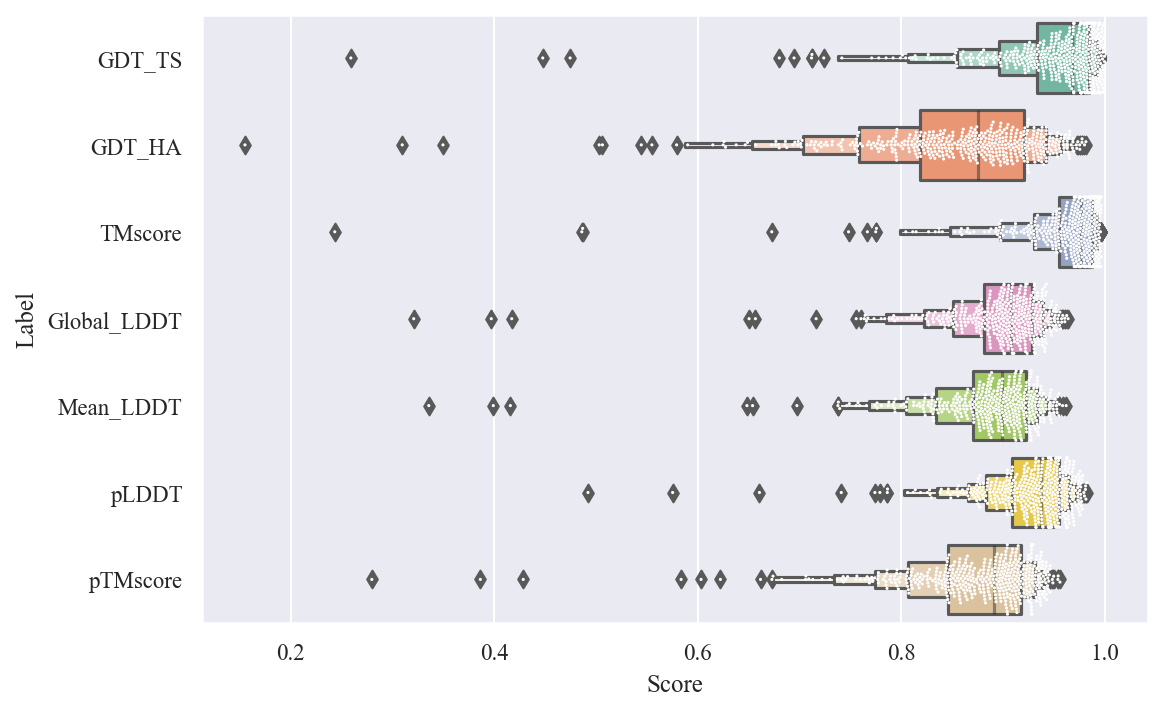

In [9]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')


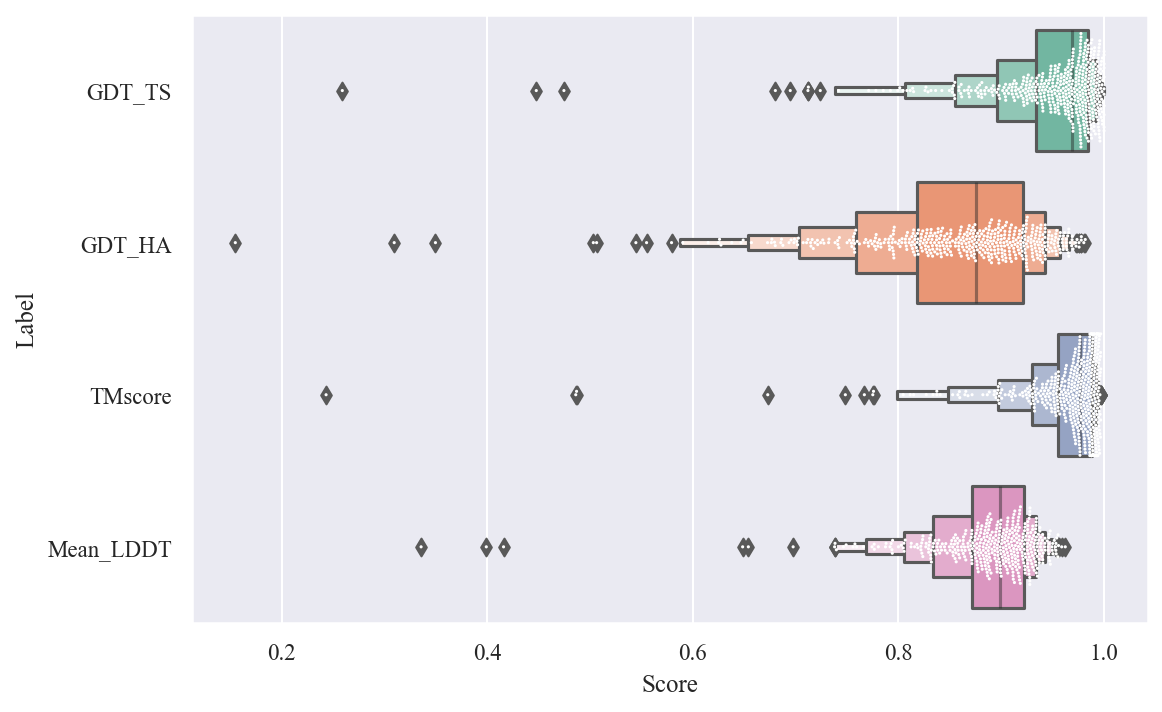

In [10]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels.png')

### Verify whether the quality of the predicted structure changes between targets that have similar sequences in the AlphaFold training data and targets that do not

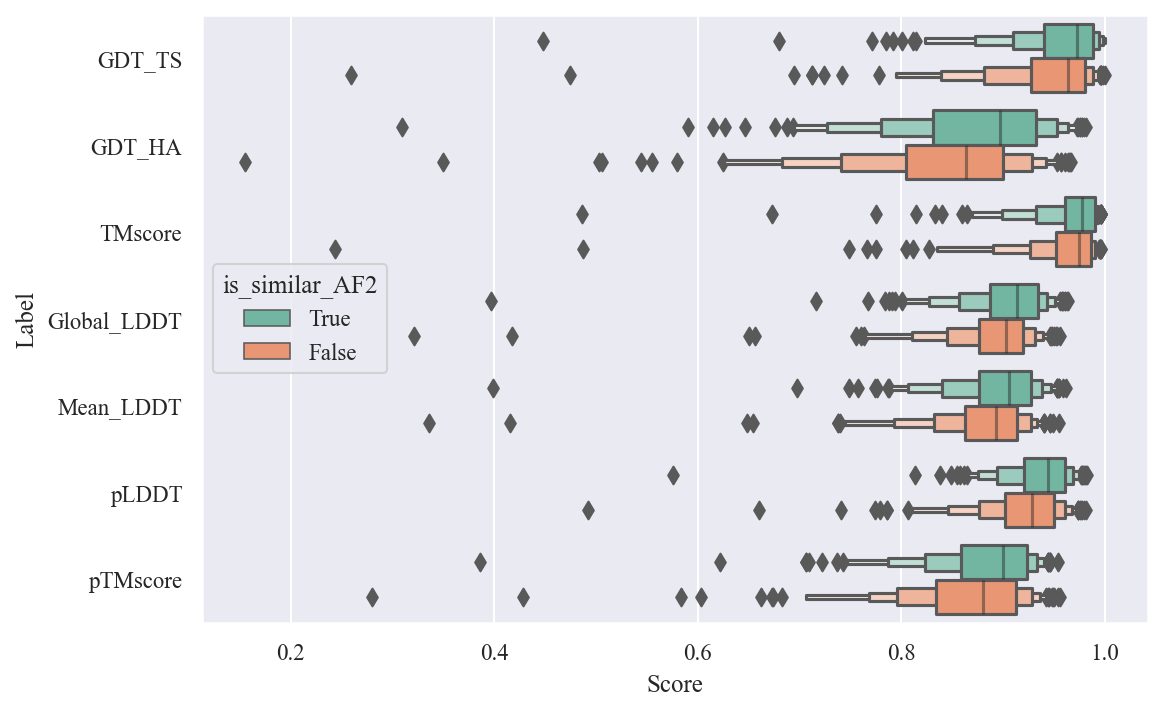

In [11]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

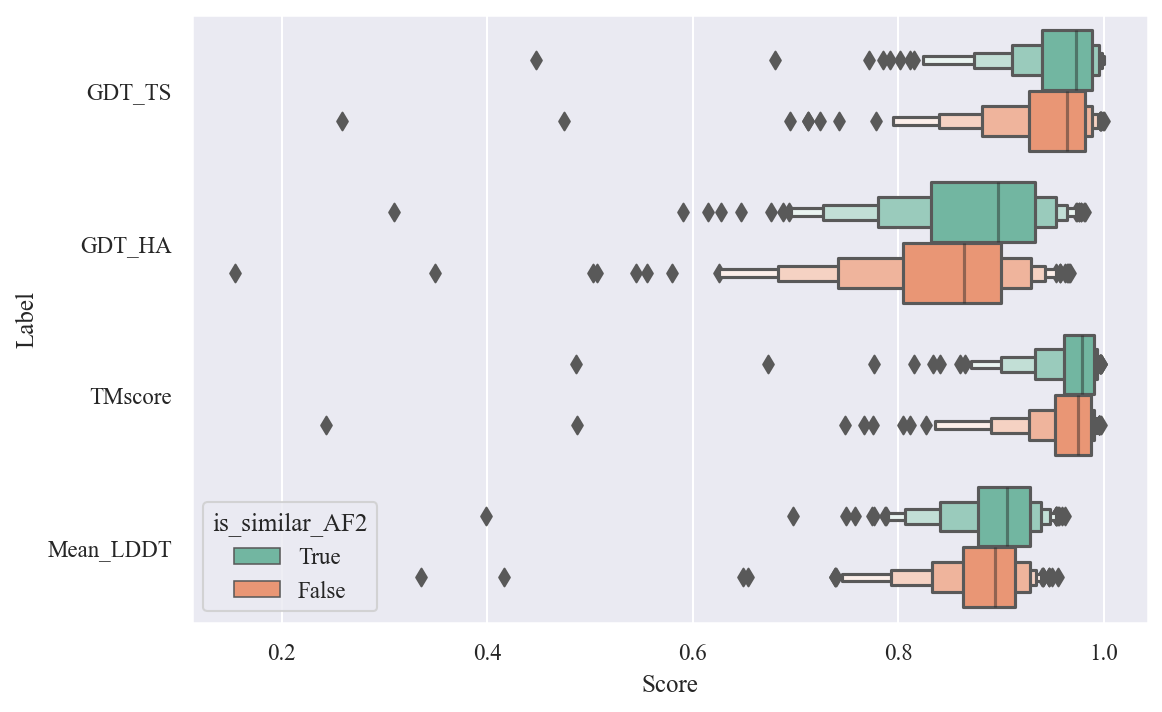

In [12]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

In [13]:
# Statistical test
similar_df = label_max_df[label_max_df['is_similar_AF2'] == True]
not_similar_df = label_max_df[label_max_df['is_similar_AF2'] == False]
for label in labels:
    print(label)
    x = similar_df.query('Label == @label')['Score']
    y = not_similar_df.query('Label == @label')['Score']
    print(f'{x.mean():.3f}, {y.mean():.3f}')
    result = stats.mannwhitneyu(x, y)
    print(result)

GDT_TS
0.955, 0.941
MannwhitneyuResult(statistic=26117.5, pvalue=0.000743939798242371)
GDT_HA
0.873, 0.839
MannwhitneyuResult(statistic=23750.0, pvalue=1.7199613019462586e-06)
TMscore
0.965, 0.957
MannwhitneyuResult(statistic=27354.5, pvalue=0.007949031999785435)
Mean_LDDT
0.894, 0.878
MannwhitneyuResult(statistic=28727.0, pvalue=0.059194037979486594)


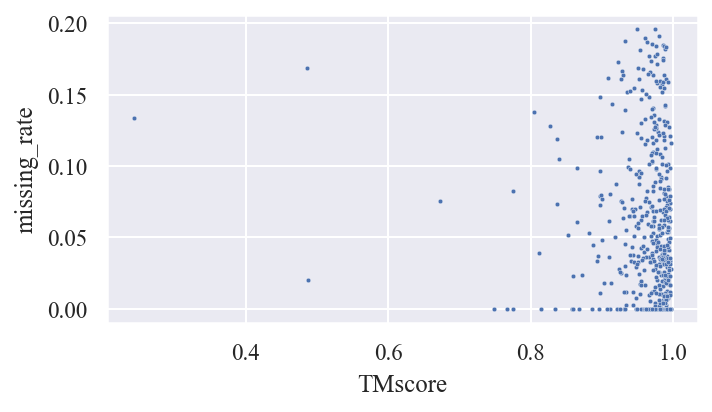

In [14]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

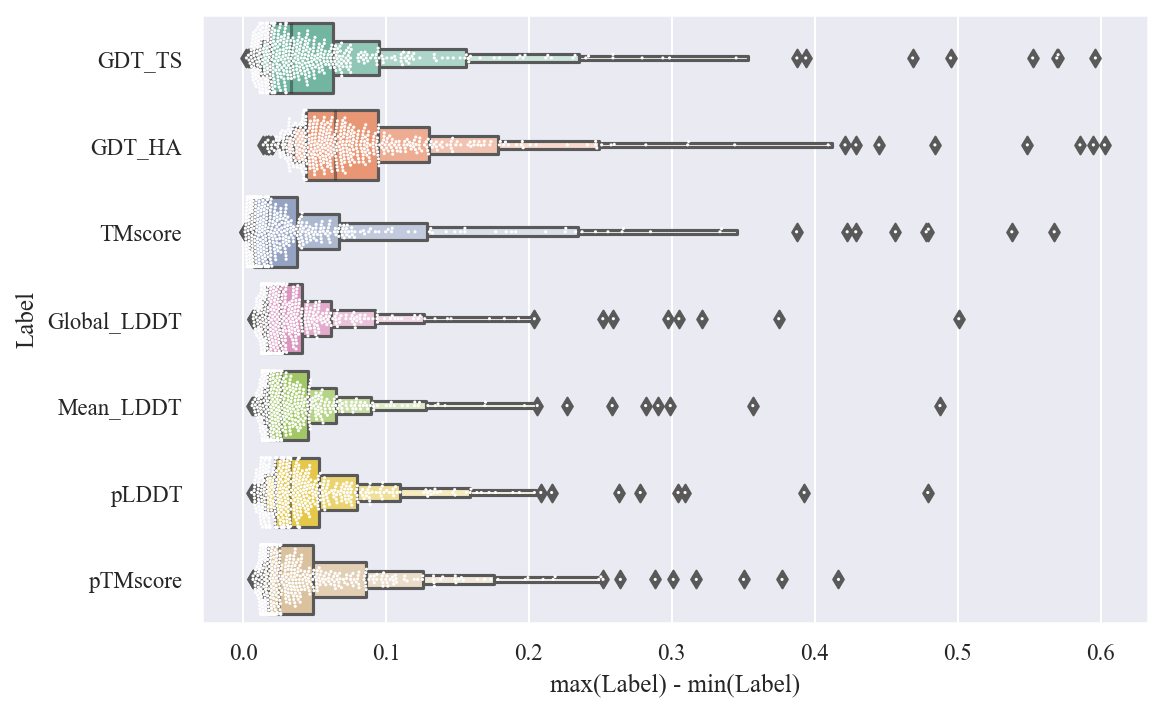

In [15]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

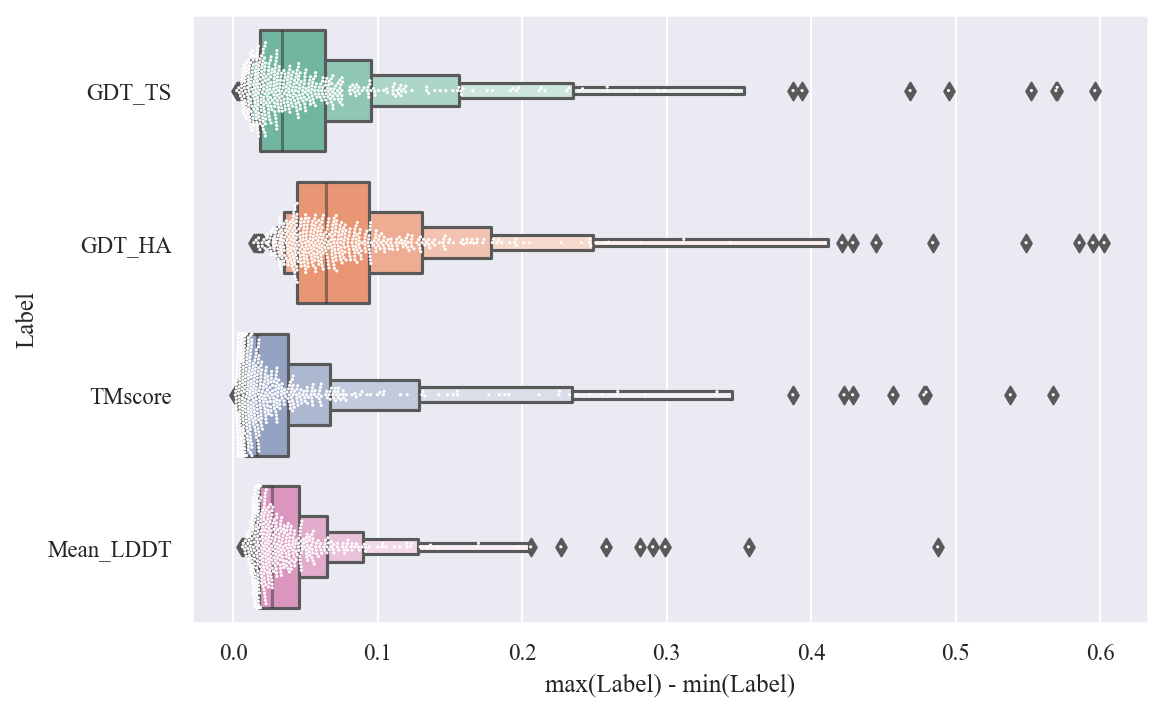

In [16]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

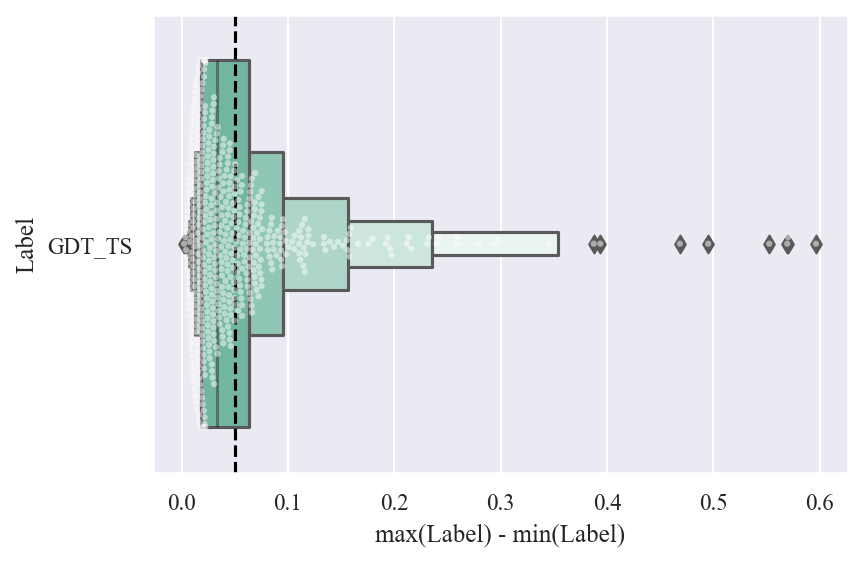

In [17]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS']
# labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(6, 4))
# plt.axvline(x=0.05, color='black', linestyle='--')
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=3, alpha=0.5)
plt.axvline(x=0.05, color='black', linestyle='--')
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

In [18]:
# Count target number whose value difference between max and min is larger than threshold
label = 'GDT_TS'
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() >= 0.05)
print(fil_df['Target'].unique().size)
print(fil_df.groupby('Target').head(1)['is_similar_AF2'].value_counts())

165
False    102
True      63
Name: is_similar_AF2, dtype: int64


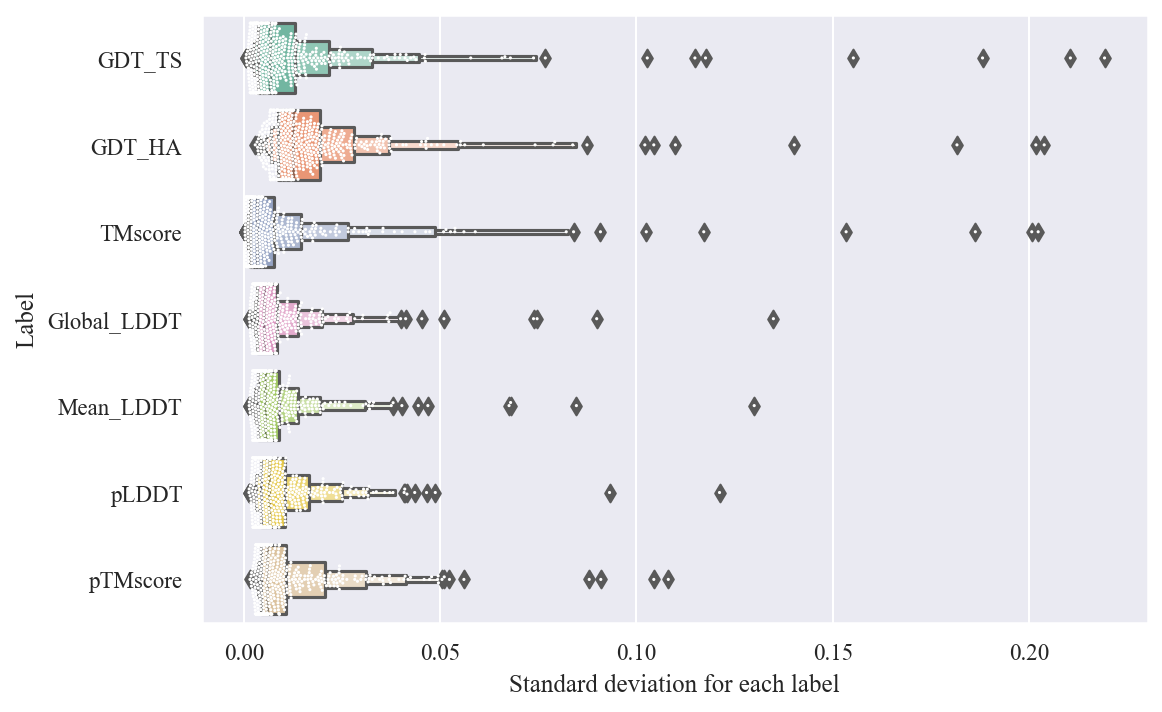

In [19]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

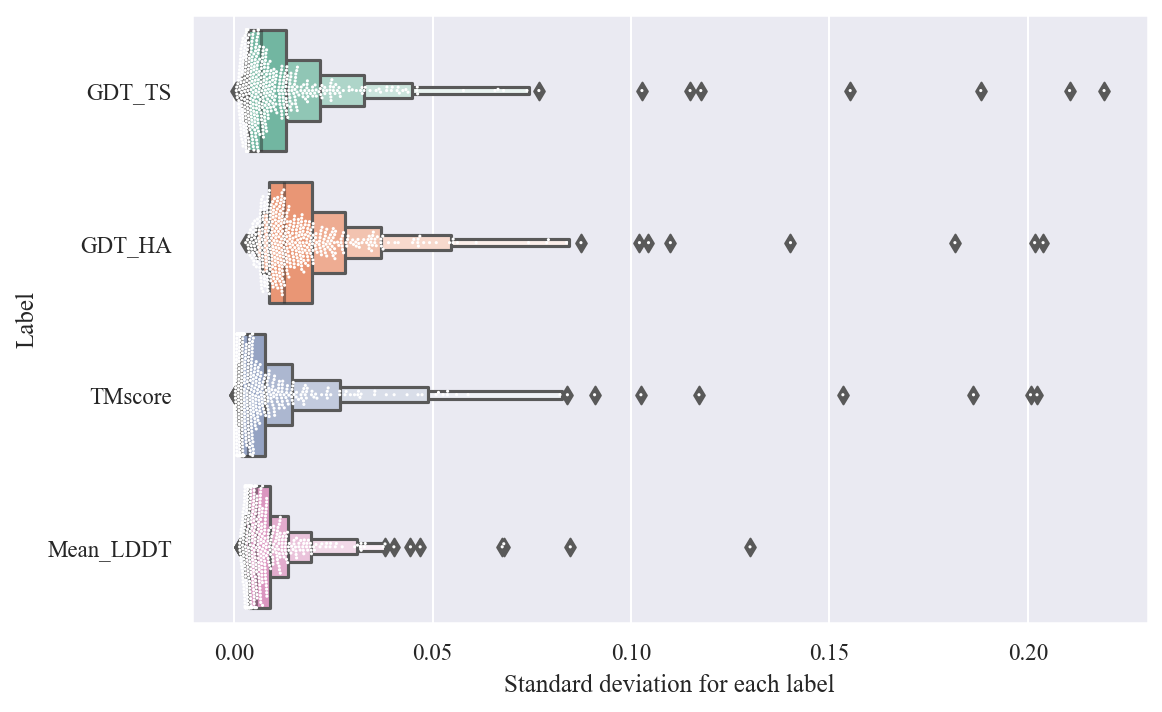

In [20]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
# plt.savefig(fig_dir / 'std_each_labels.png')

## Verify pLDDT and pTM

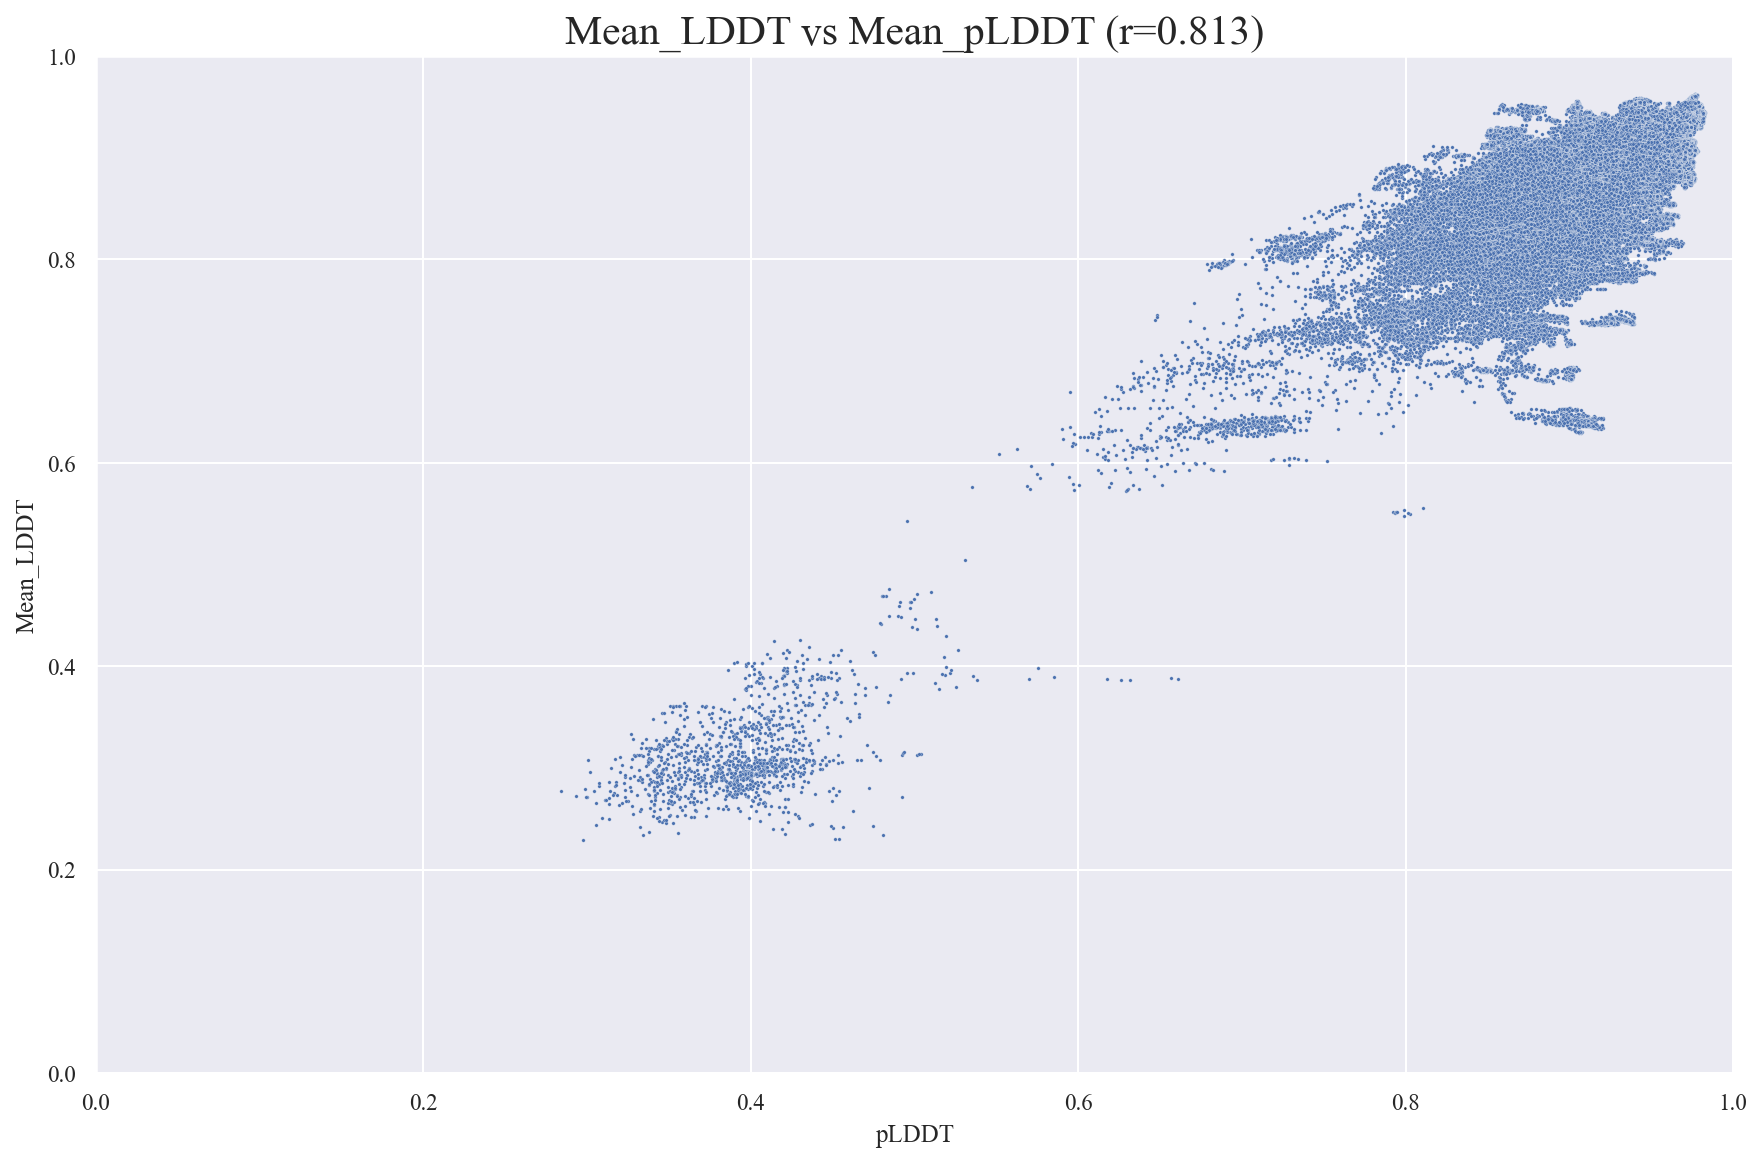

In [21]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


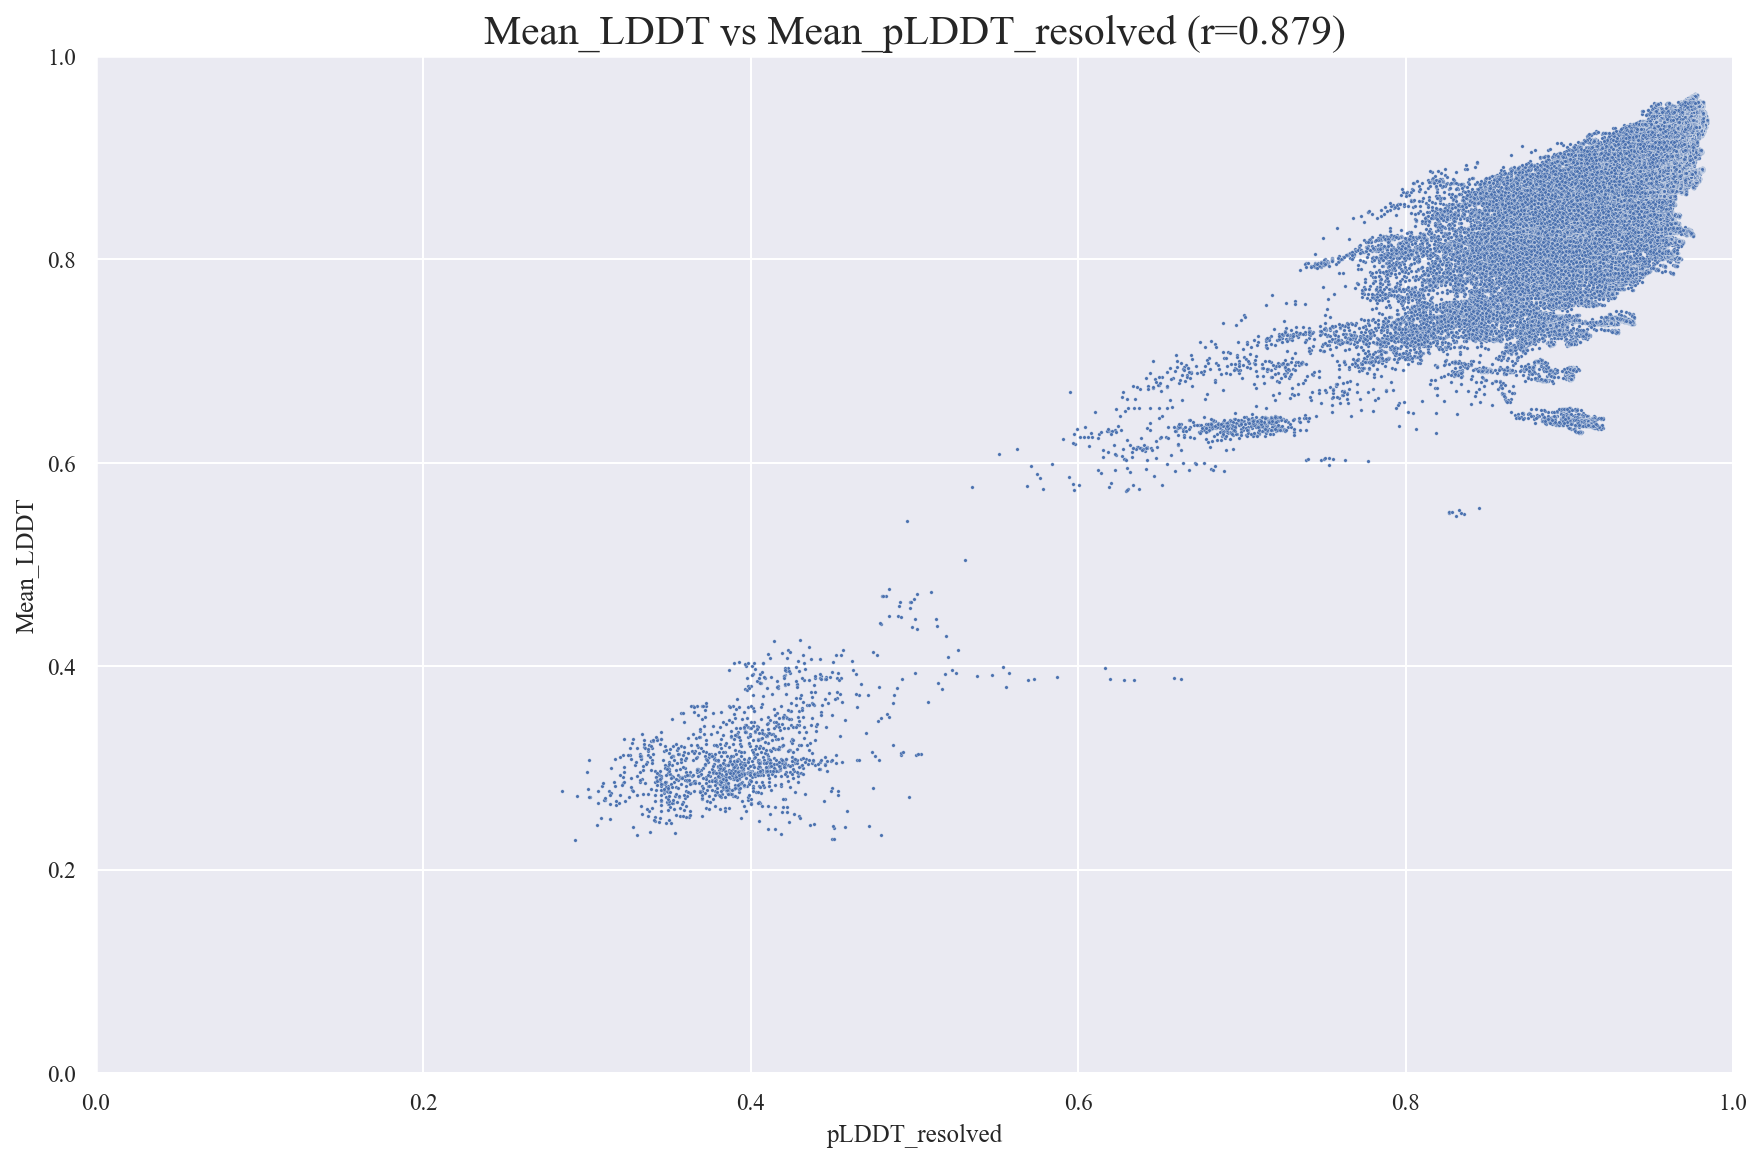

In [22]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT_resolved'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


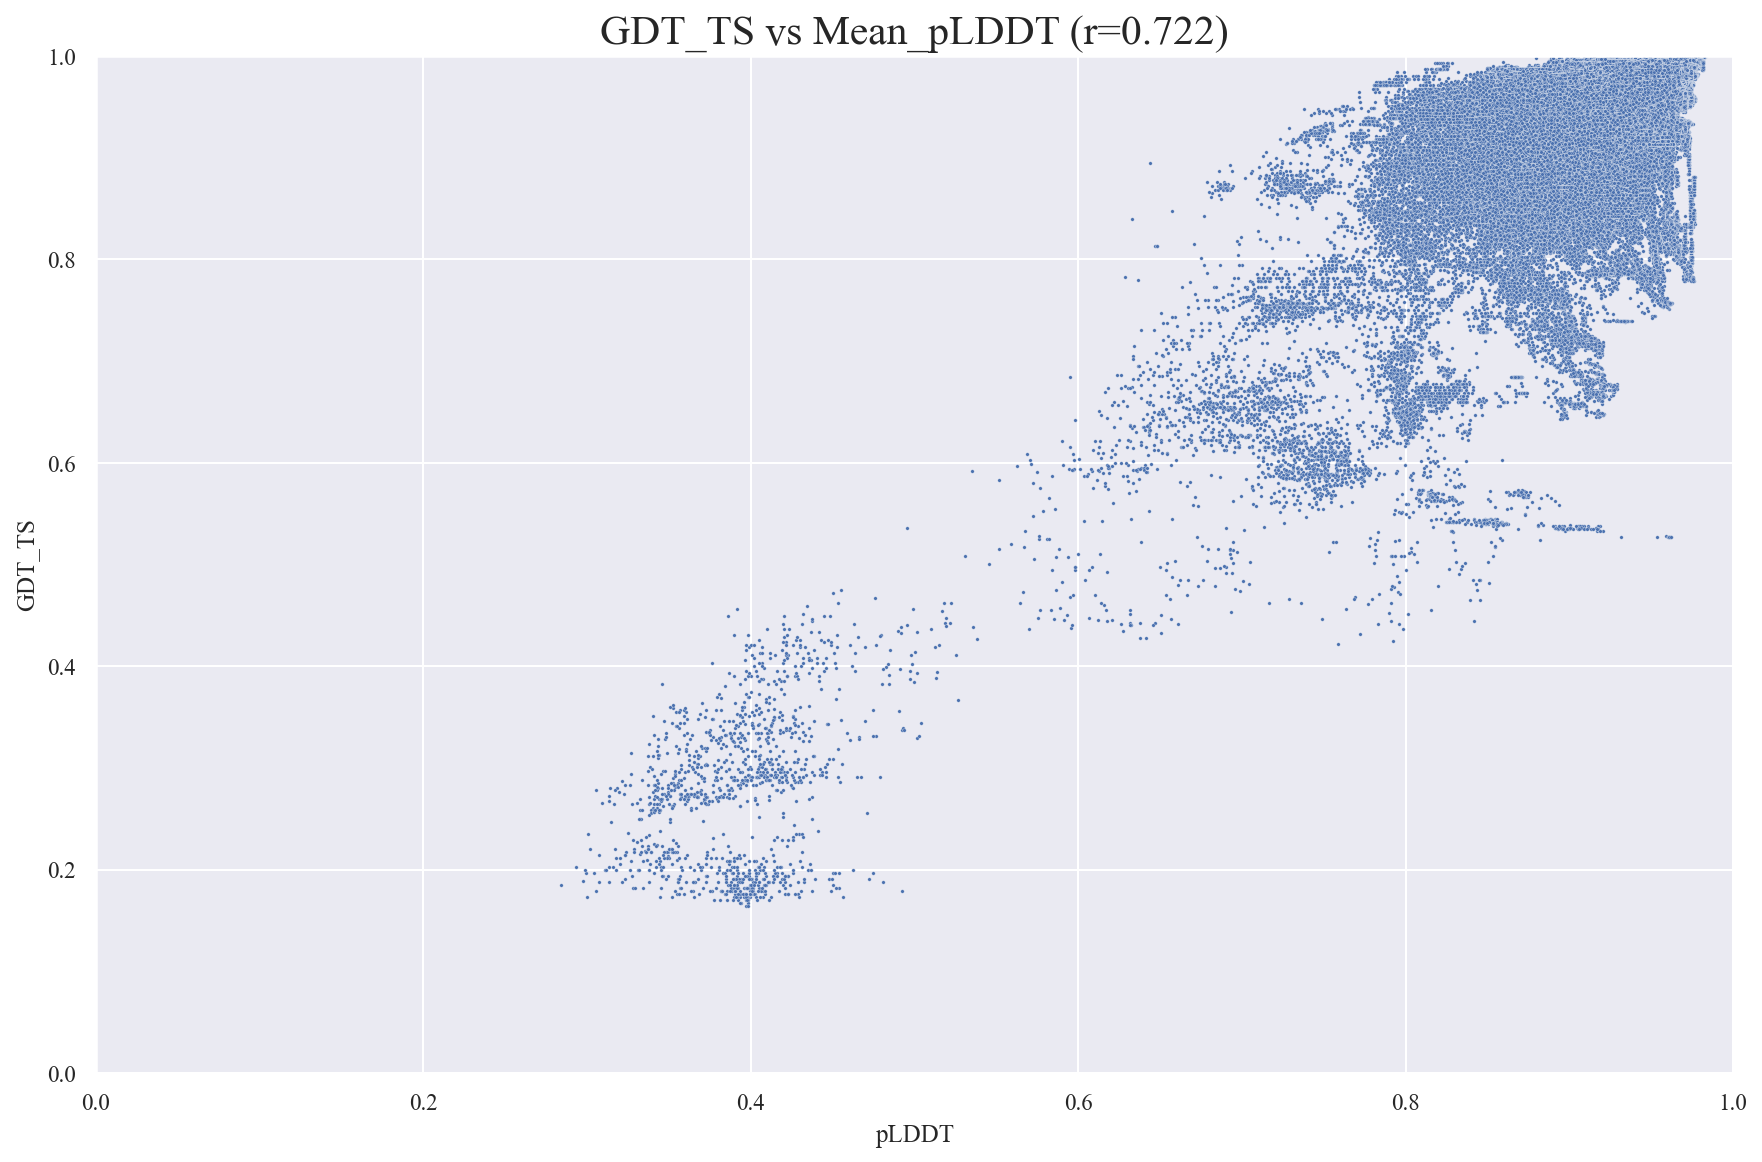

In [23]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


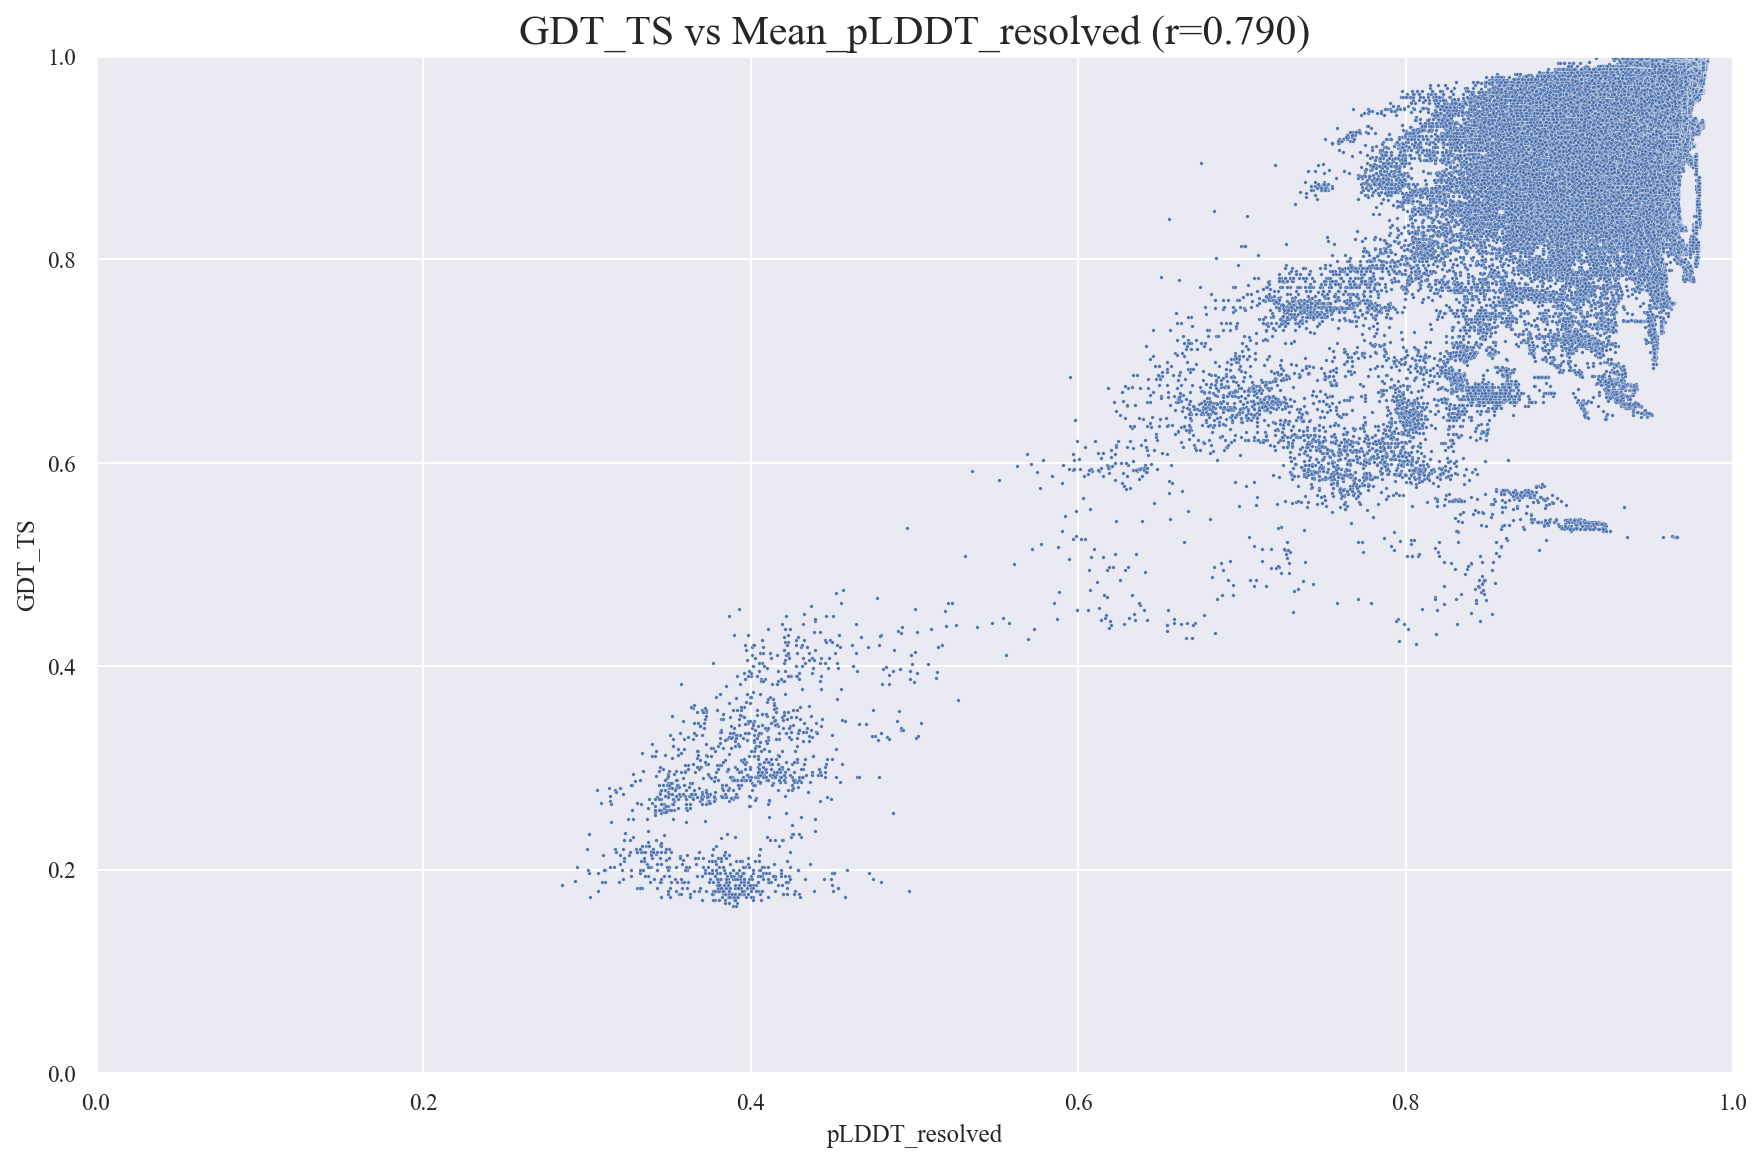

In [24]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT_resolved'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


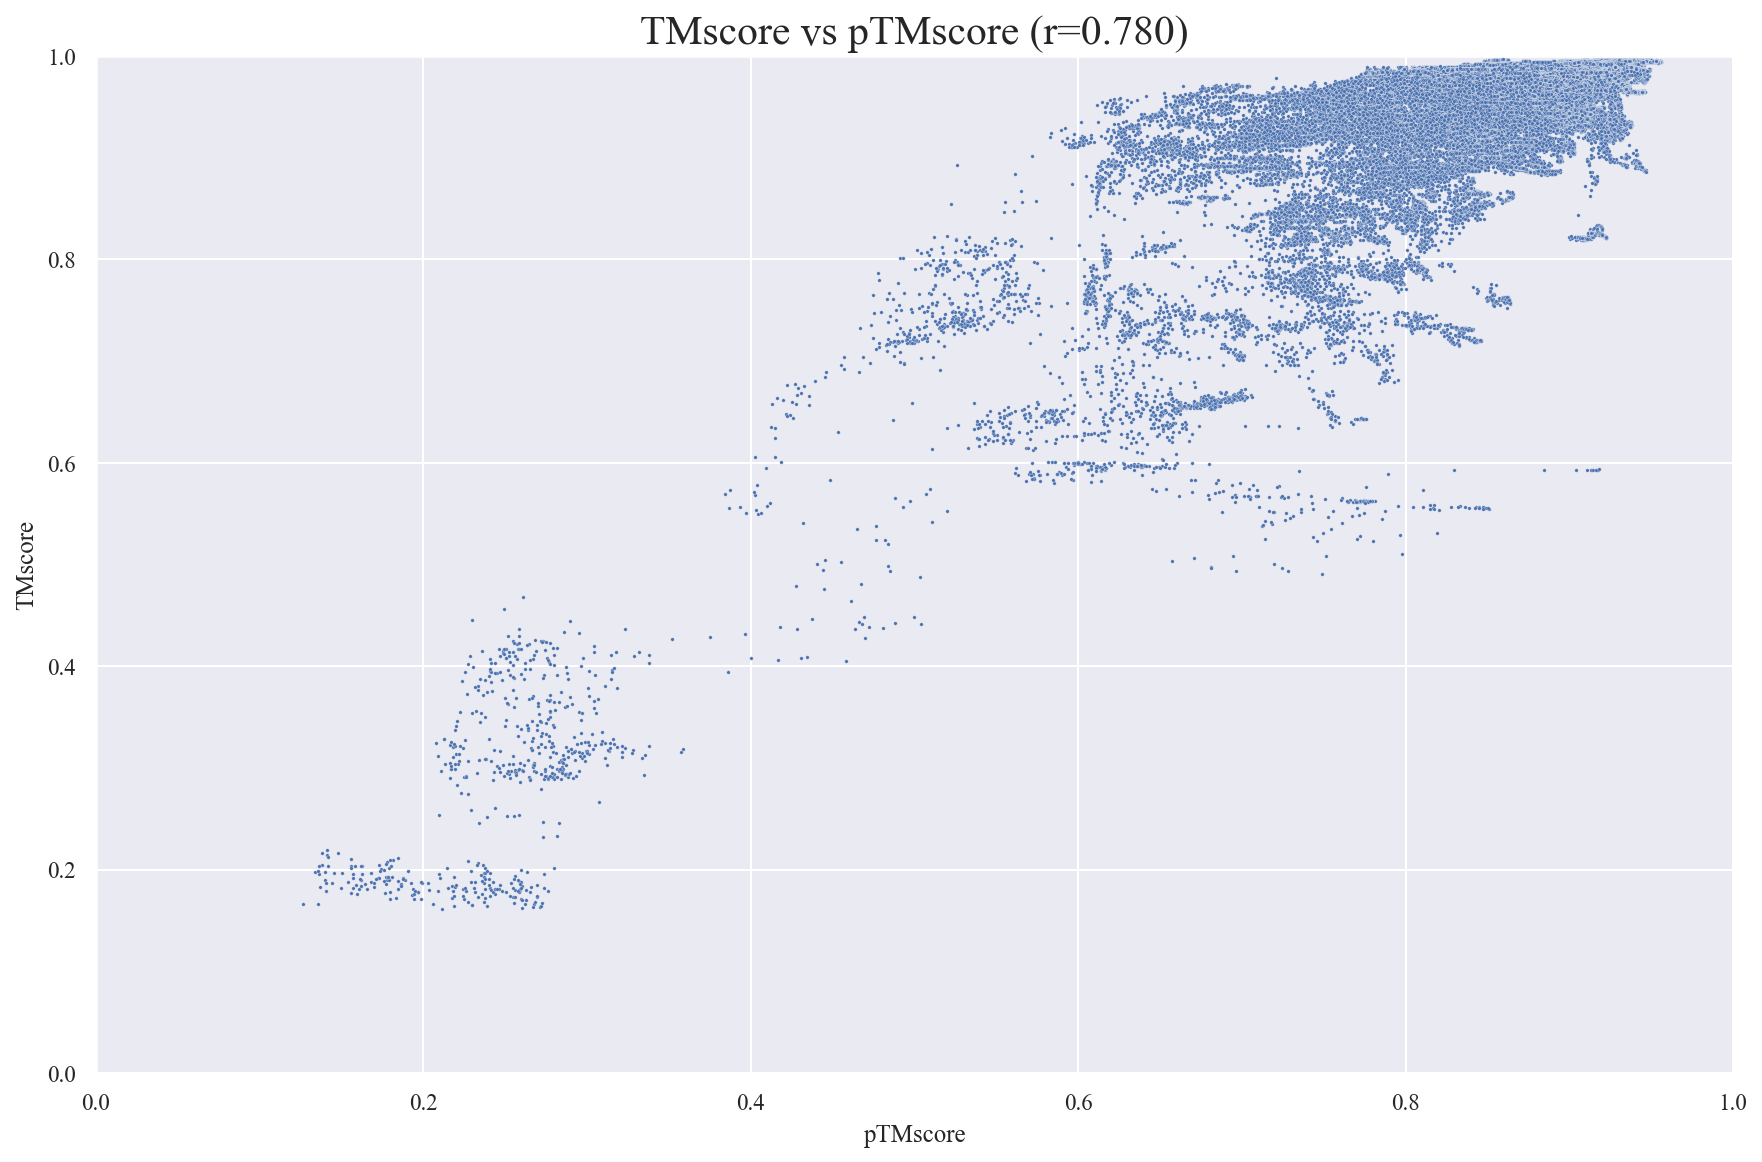

In [25]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

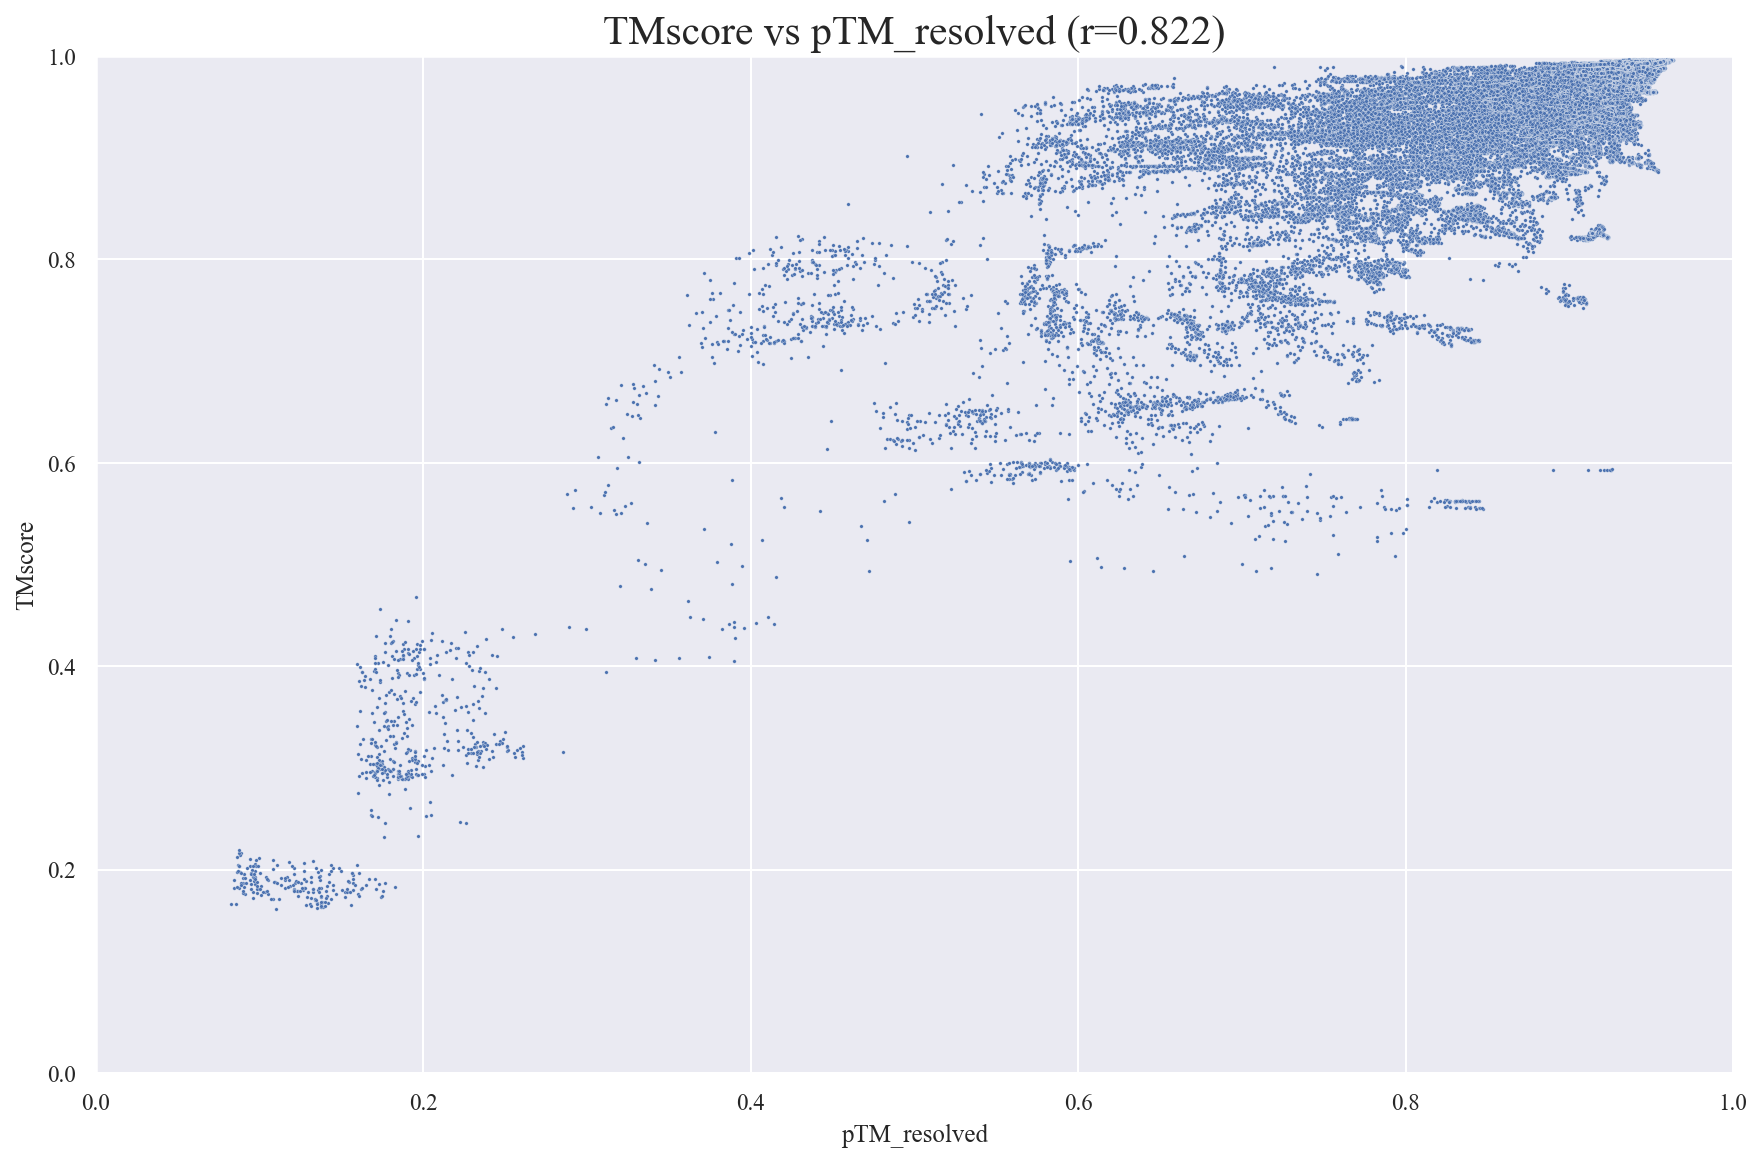

In [26]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTM_resolved'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

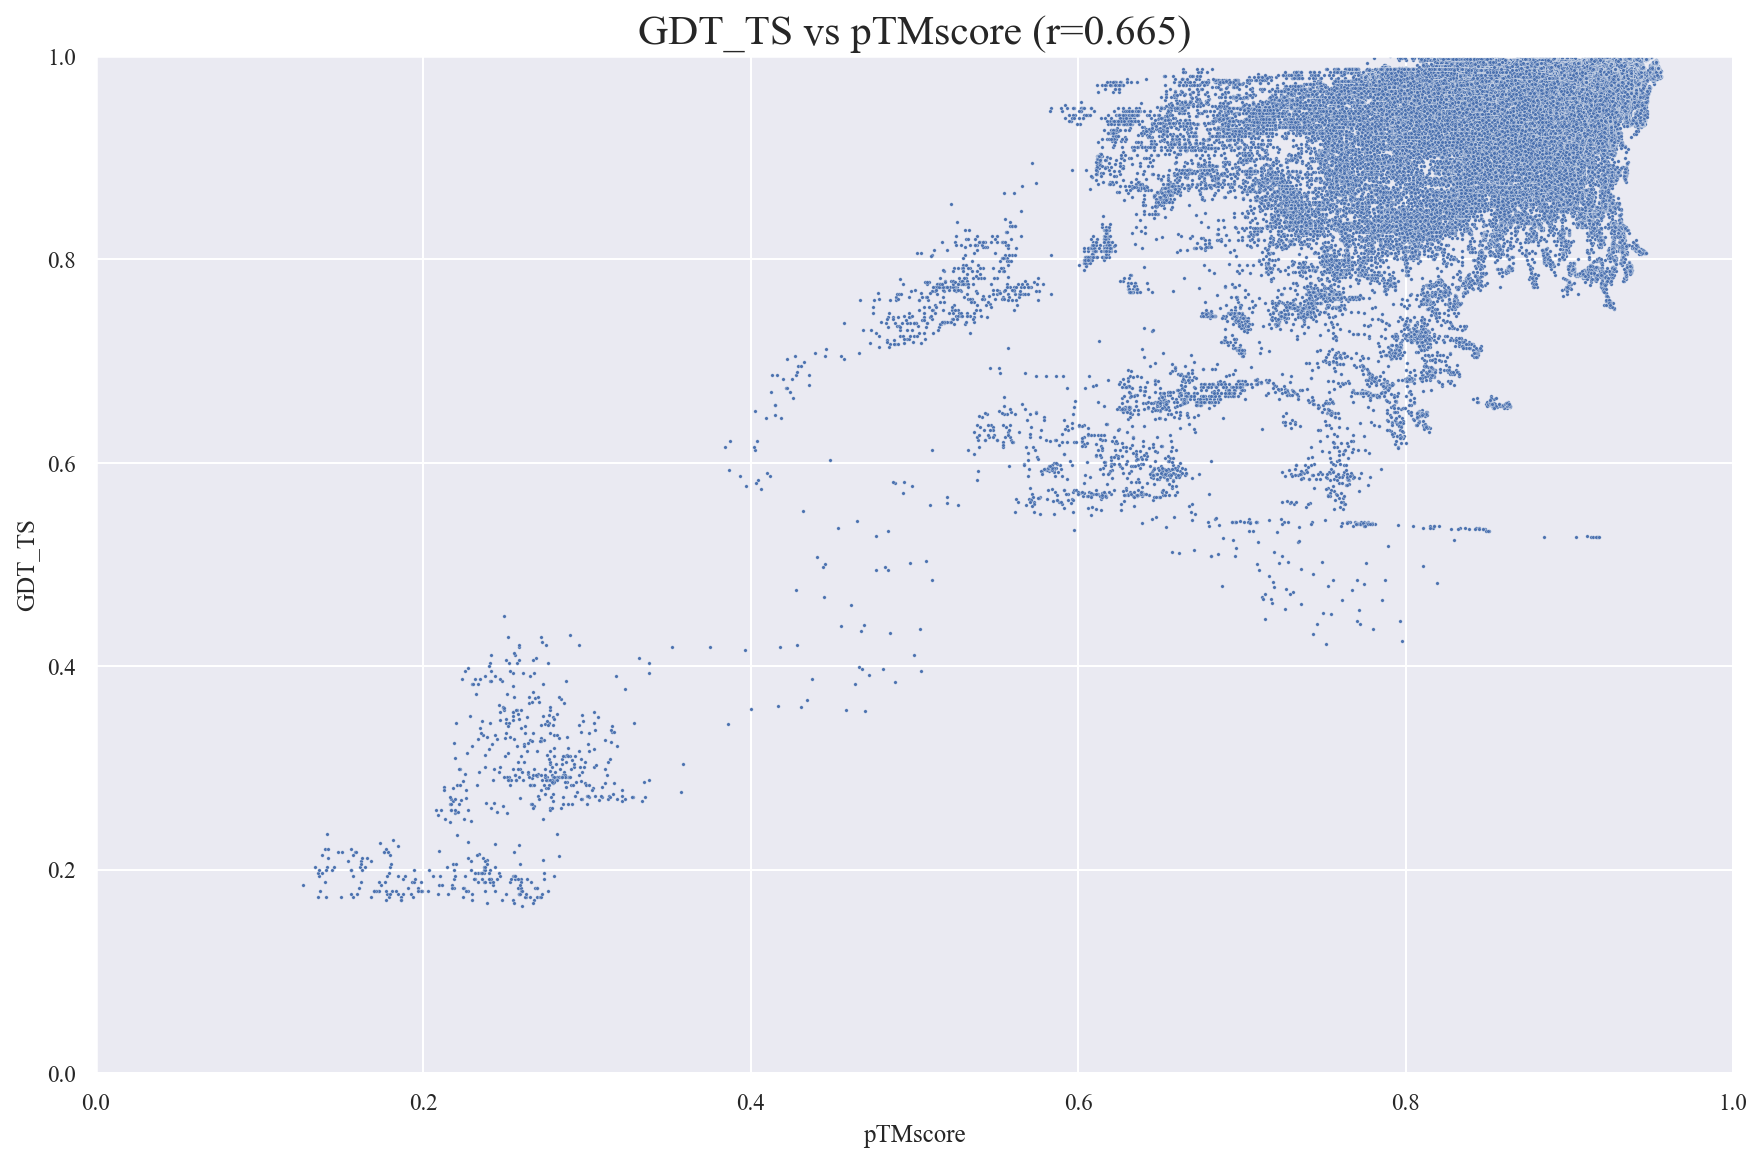

In [27]:
# pTMscore vs GDT_TS
label = 'GDT_TS'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

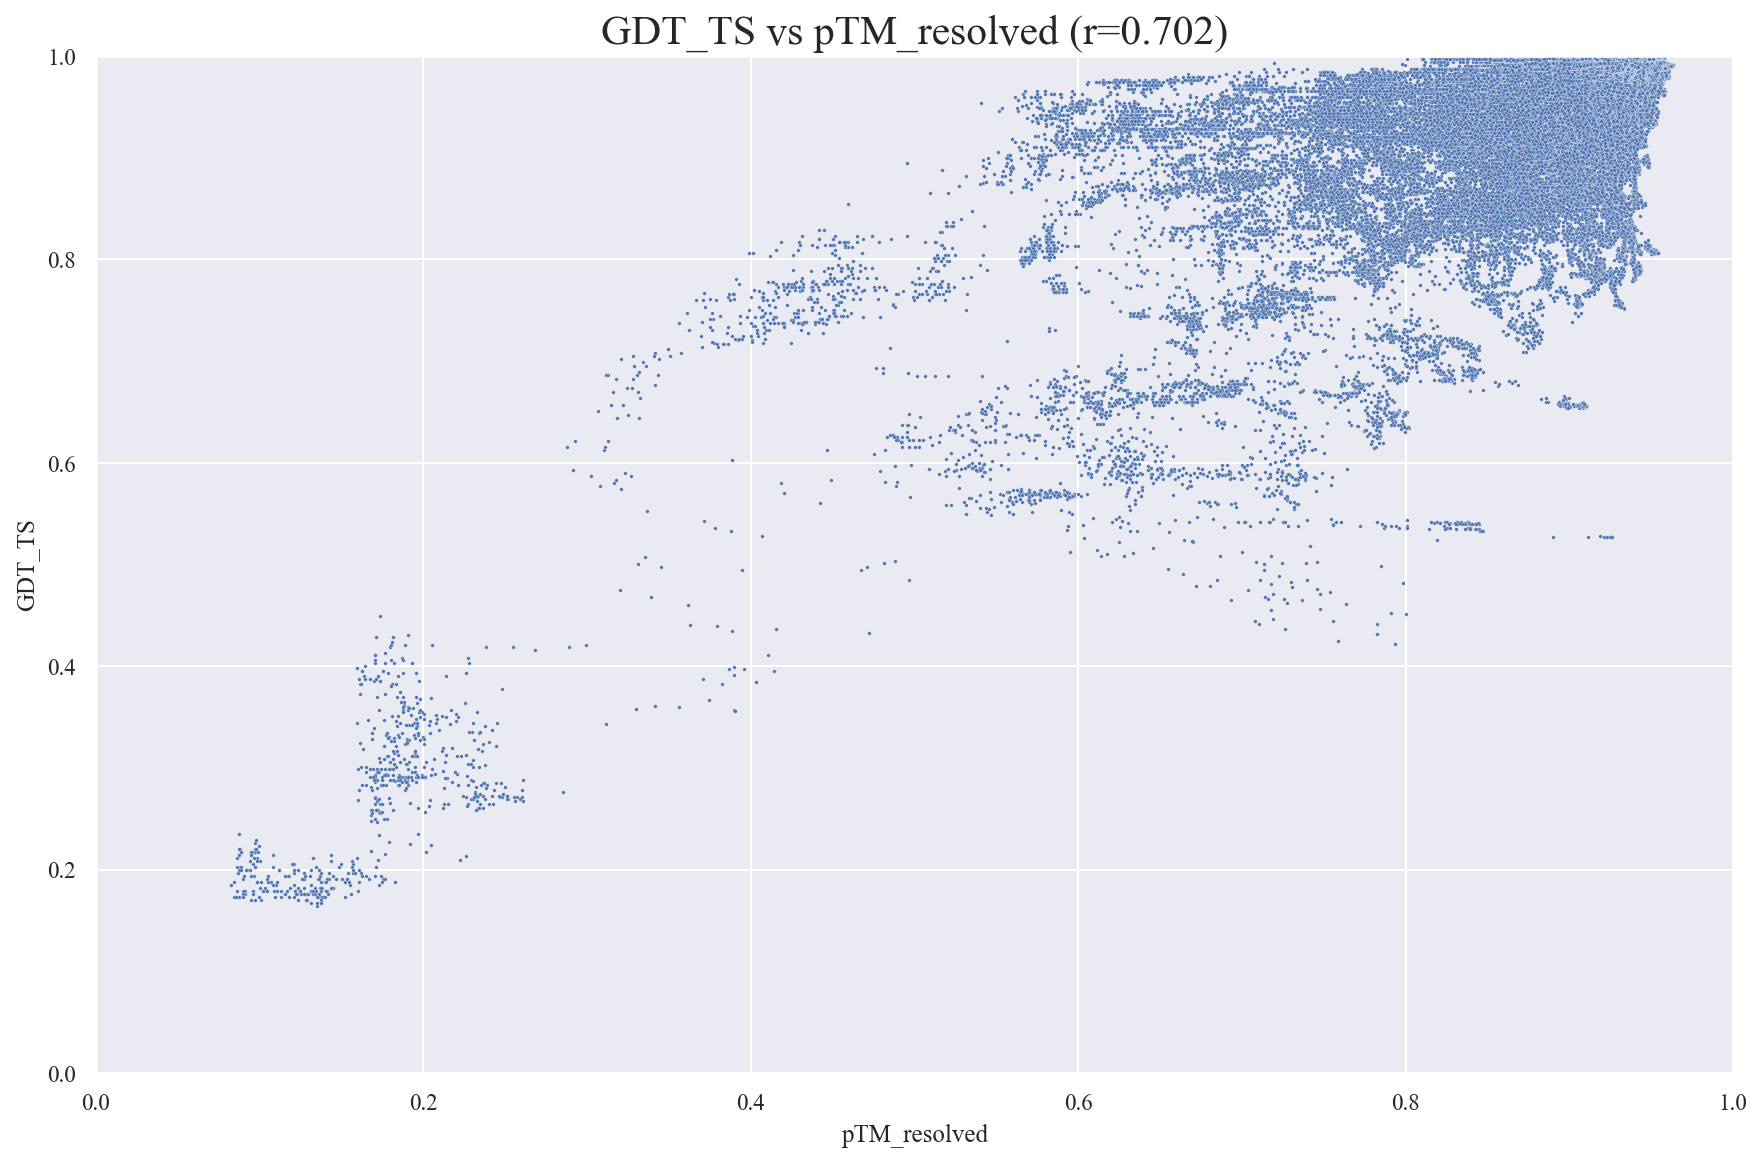

In [28]:
# pTMscore vs GDT_TS
label = 'GDT_TS'
score = 'pTM_resolved'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

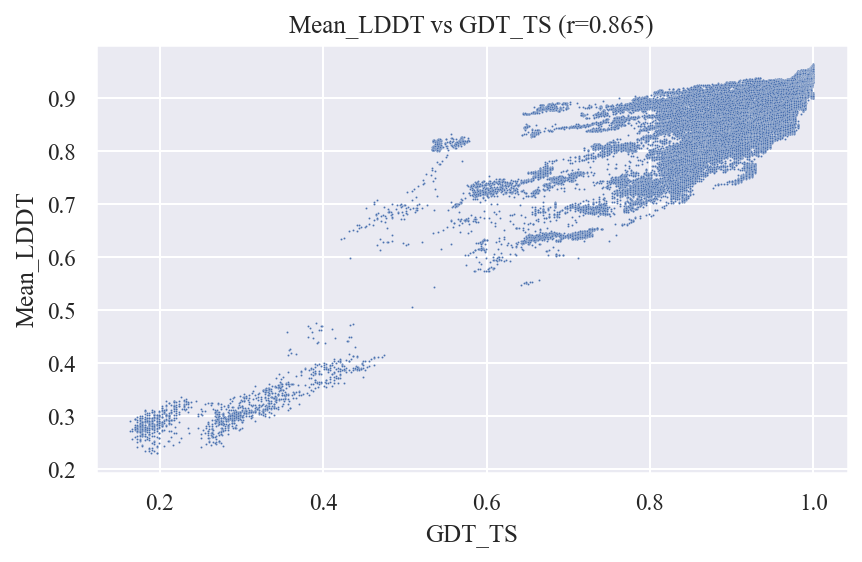

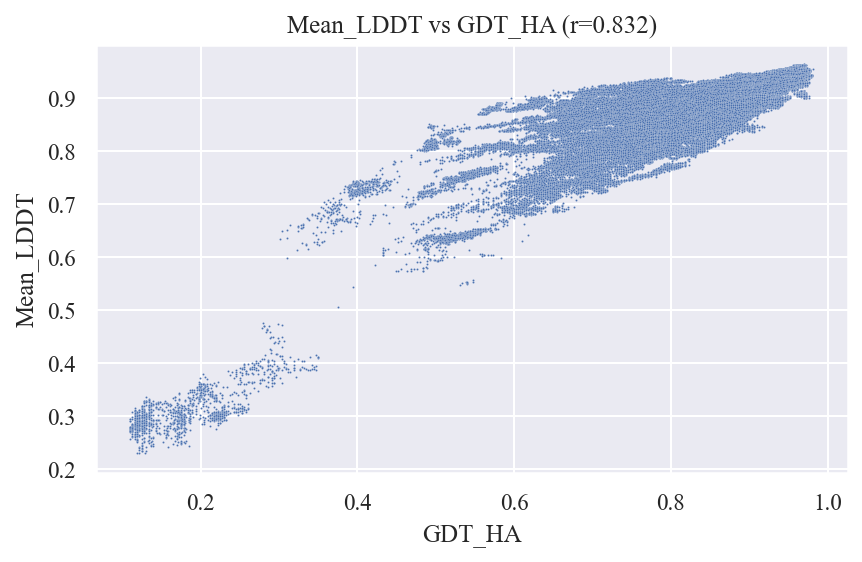

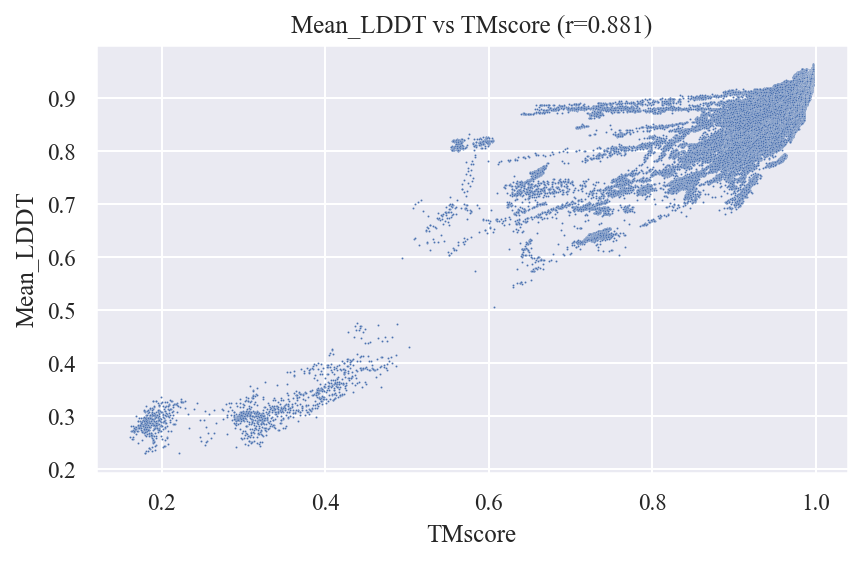

In [29]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

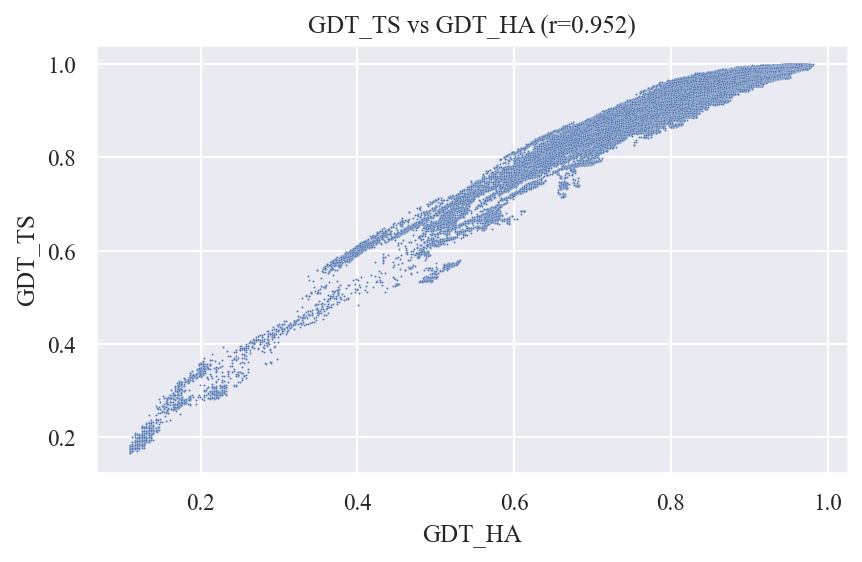

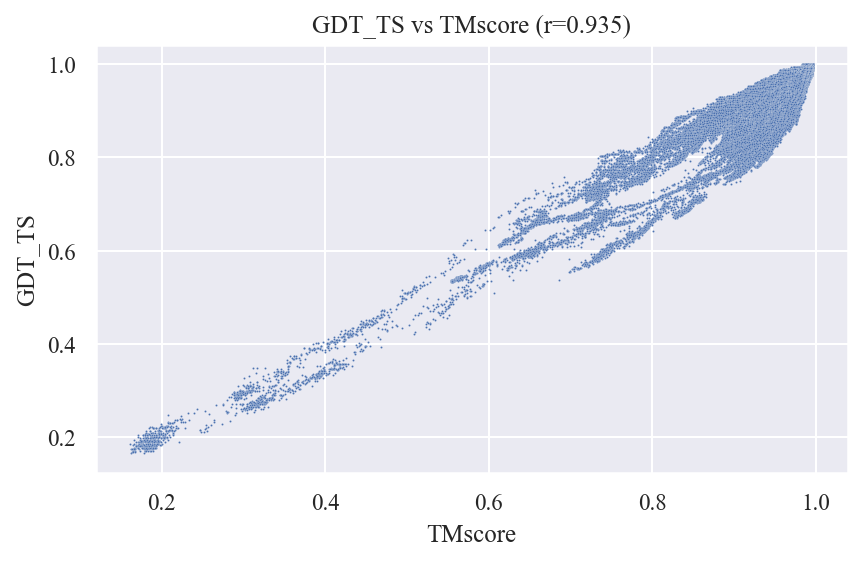

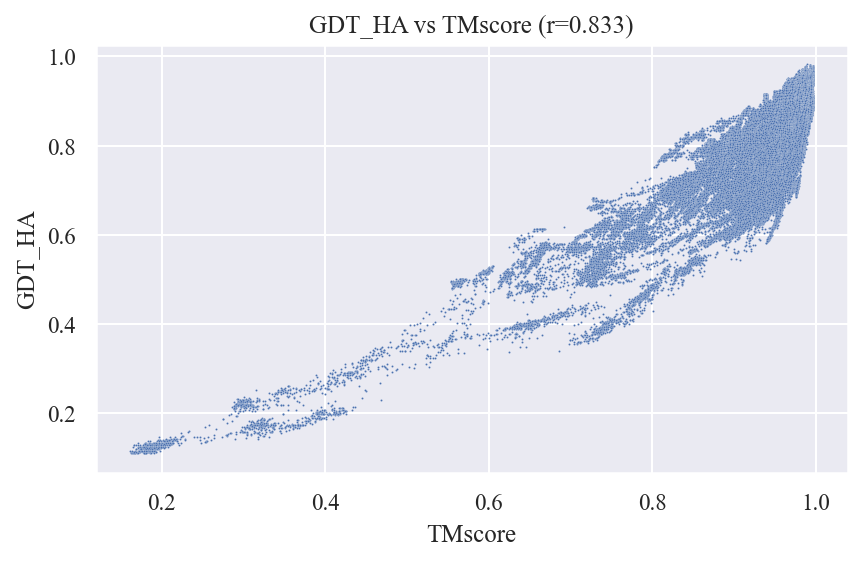

In [30]:
# Correlation between global labels
global_labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for i, label1 in enumerate(global_labels):
    for label2 in global_labels[i + 1:]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=label2, y=label1, s=1)
        cc = df.corr()[label1][label2]
        plt.title(f'{label1} vs {label2} (r={cc:.3f})')
        plt.tight_layout()
    plt.show()

## Relationship between accuracy and (Neff and cluster size)

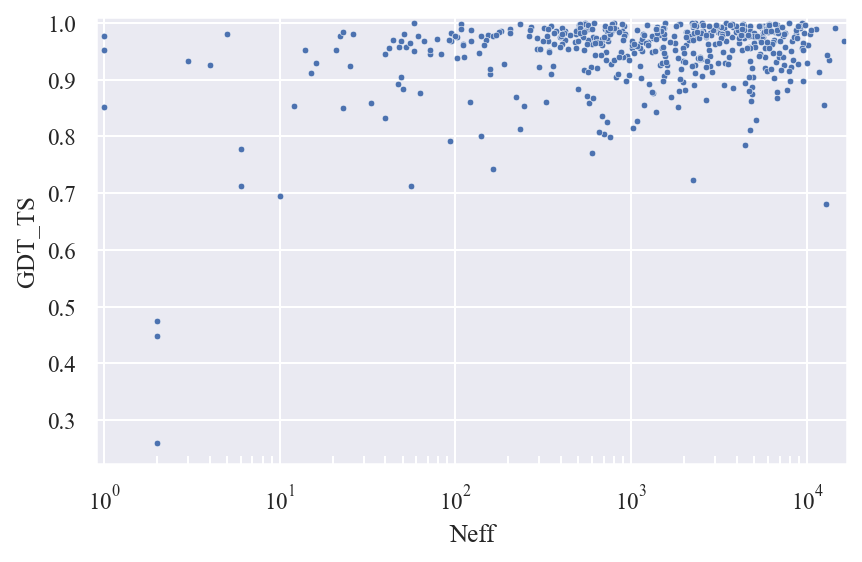

In [31]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
data = df.groupby('Target').max(label)
g = sns.scatterplot(data=data, y=label, x='Neff', s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_neff_{label}.png')
plt.show()

905


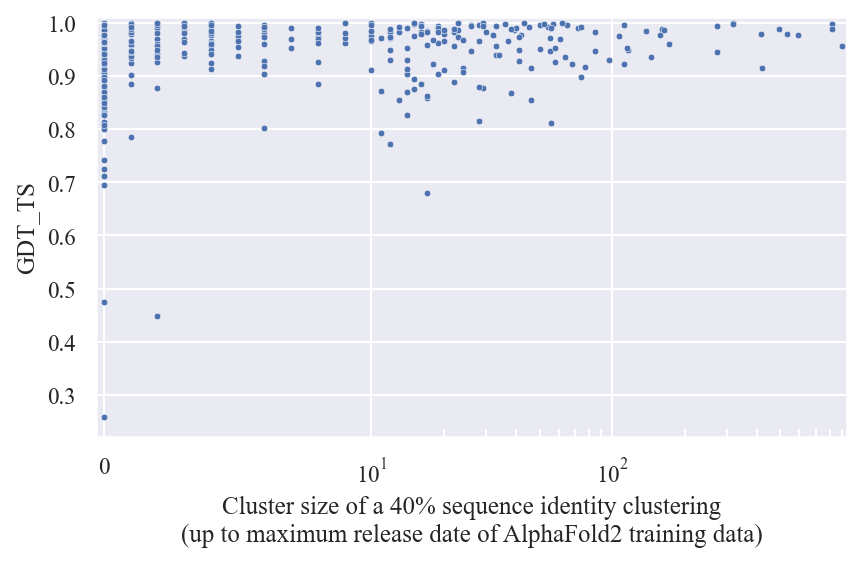

In [32]:
from matplotlib.ticker import SymmetricalLogLocator, FixedLocator
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
df['num_entry_before_cluster'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']
x = 'num_entry_before_cluster'
print(df['num_entry_before_cluster'].max())
data = df.groupby('Target').max(label)
g = sns.scatterplot(data=data, y=label, x=x, s=10)
plt.xlim(-0.3, None)
plt.ylim(None, 1.01)
plt.xscale('symlog', linthresh=10, base=10)
g.xaxis.set_minor_locator(SymmetricalLogLocator(base=10, subs=range(1, 10), linthresh=10))
# g.xaxis.set_minor_locator(FixedLocator(range(0, 10)))
g.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.xlabel('Cluster size of a 40% sequence identity clustering\n(up to maximum release date of AlphaFold2 training data)')
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_cluster_size_upto_max_release_date_{label}.png')
plt.show()

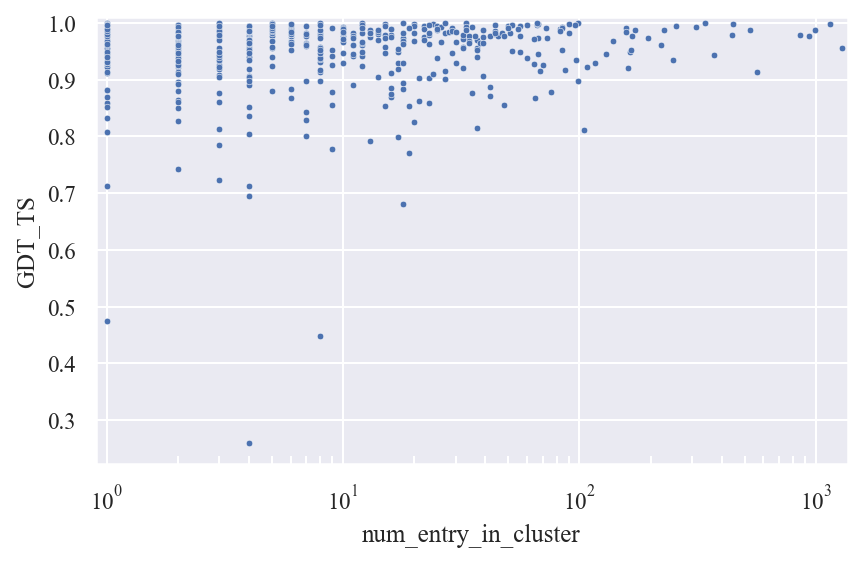

In [33]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
x = 'num_entry_in_cluster'
data = df.groupby('Target').max(label)
g = sns.scatterplot(data=data, y=label, x=x, s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
# plt.savefig(fig_dir / f'scatter_cluster_size_{label}.png')
plt.show()

## Relationship between pLDDT and (Neff and cluster size)

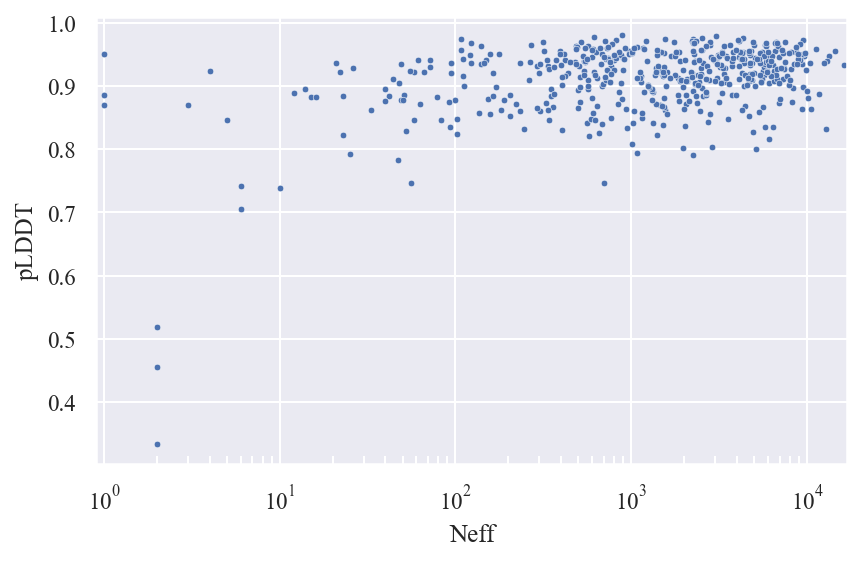

In [34]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
data = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()])
y = 'pLDDT'
g = sns.scatterplot(data=data, y=y, x='Neff', s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
plt.show()

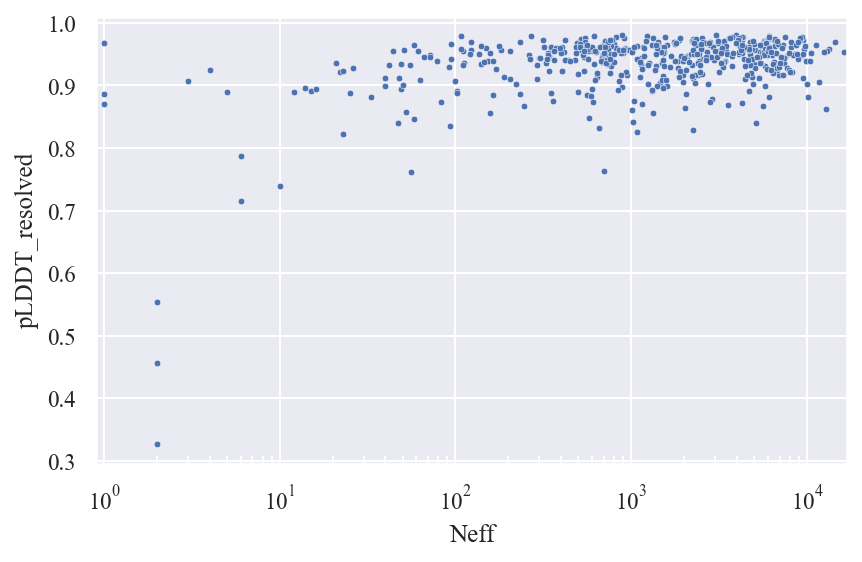

In [35]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
data = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()])
y = 'pLDDT_resolved'
g = sns.scatterplot(data=data, y=y, x='Neff', s=10)
plt.xlim(0.9, None)
plt.ylim(None, 1.01)
plt.xscale('log')
plt.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.tight_layout()
plt.show()

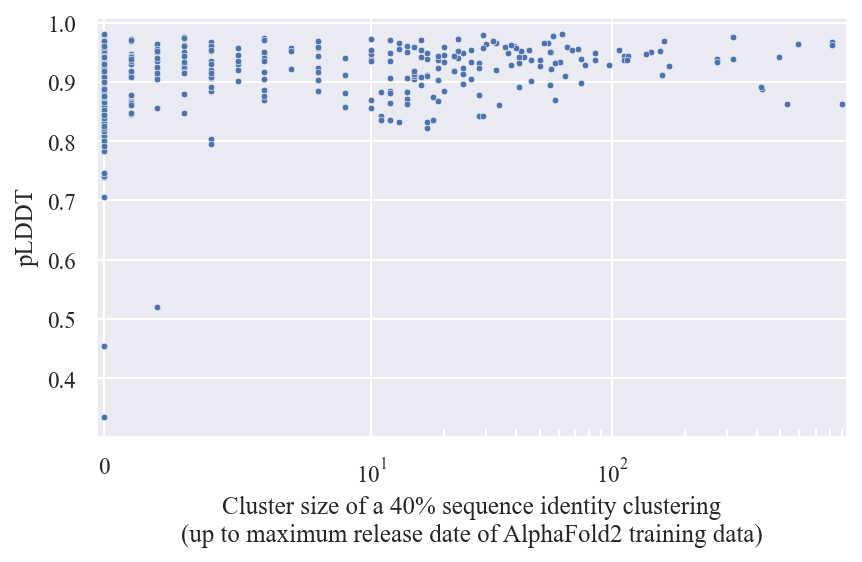

In [36]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
x = 'num_entry_before_cluster'
data = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()])
y = 'pLDDT'
g = sns.scatterplot(data=data, y=y, x=x, s=10)
plt.xlim(-0.3, None)
plt.ylim(None, 1.01)
plt.xscale('symlog', linthresh=10, base=10)
g.xaxis.set_minor_locator(SymmetricalLogLocator(base=10, subs=range(1, 10), linthresh=10))
# g.xaxis.set_minor_locator(FixedLocator(range(0, 10)))
g.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.xlabel('Cluster size of a 40% sequence identity clustering\n(up to maximum release date of AlphaFold2 training data)')
plt.tight_layout()
plt.show()

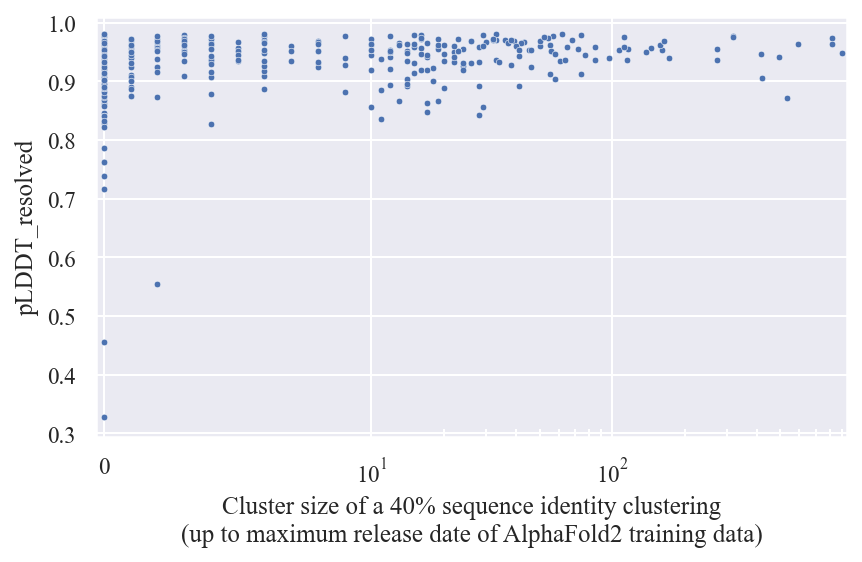

In [37]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
x = 'num_entry_before_cluster'
data = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()])
y = 'pLDDT_resolved'
g = sns.scatterplot(data=data, y=y, x=x, s=10)
plt.xlim(-0.3, None)
plt.ylim(None, 1.01)
plt.xscale('symlog', linthresh=10, base=10)
g.xaxis.set_minor_locator(SymmetricalLogLocator(base=10, subs=range(1, 10), linthresh=10))
# g.xaxis.set_minor_locator(FixedLocator(range(0, 10)))
g.tick_params(axis='x', which='minor', direction='in', color='white', bottom=True)
plt.xlabel('Cluster size of a 40% sequence identity clustering\n(up to maximum release date of AlphaFold2 training data)')
plt.tight_layout()
plt.show()